# Import Basic laibraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
import tensorflow as tf

# Import Mnist dataset

In [58]:
mnist=tf.keras.datasets.mnist

# seprate into train test split

In [61]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

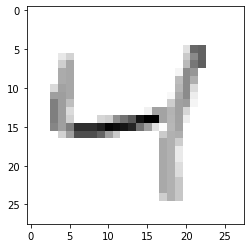

In [77]:
plt.imshow(xtrain[2],cmap=plt.cm.binary)
print(xtrain[2])
print(ytrain[2])

# Normalization of data

In [76]:
xtrain=tf.keras.utils.normalize(xtrain,axis=1)
xtest=tf.keras.utils.normalize(xtest,axis=1)

# import deep learning laibraries

In [80]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.optimizers import SGD,Adam

In [85]:
model=Sequential()
model.add(Flatten())#flatten the layer(input)
model.add(Dense(128,activation='relu'))#hidden layer
model.add(Dense(128,activation='relu'))#hidden layer
model.add(Dense(10,activation='softmax'))#output layer

In [129]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# layer network

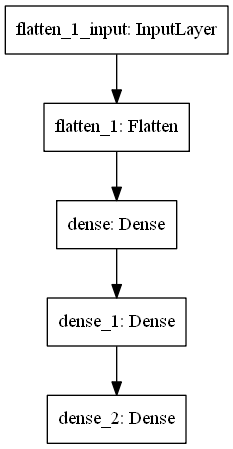

In [130]:
from tensorflow.keras.utils import plot_model
import tensorflow as tf
tf.keras.utils.plot_model(model)

In [95]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [126]:
m_histroy=model.fit(xtrain,ytrain,epochs=10)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0223 - accuracy: 0.9929
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0200 - accuracy: 0.9931
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0164 - accuracy: 0.9944
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0153 - accuracy: 0.9949
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0127 - accuracy: 0.9957


In [98]:
    model.evaluate(xtest,ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.0994 - accuracy: 0.9751


[0.09938838332891464, 0.9750999808311462]

# Prediction

In [101]:
y_pred = model.predict(xtest)

In [113]:
y_pred.shape

(10000, 10)

In [106]:
y_pred_class = np.argmax(y_pred,axis=1)

# Prediction vs actual

2


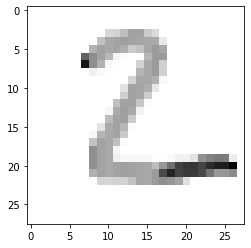

In [154]:
plt.imshow(xtest[1],cmap=plt.cm.binary) #actual
print(y_pred_class[1]) #predicted


# Graph

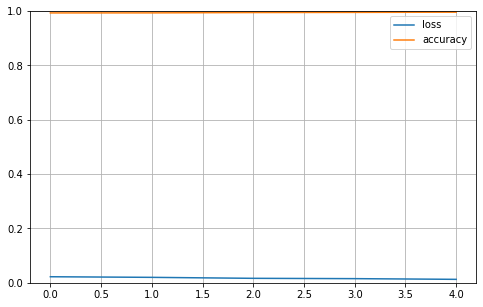

In [127]:
import matplotlib.pyplot as plt
pd.DataFrame(m_histroy.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [153]:
model.get_weights()

[array([[ 0.03548992,  0.04778749, -0.03619749, ...,  0.01781545,
          0.05388132, -0.01926035],
        [-0.04053139, -0.06932046,  0.0493883 , ...,  0.04249744,
         -0.06962577,  0.05028778],
        [-0.02155207, -0.02673667,  0.03721619, ..., -0.0388478 ,
          0.07666325,  0.02854807],
        ...,
        [-0.02042345,  0.05776622, -0.04113098, ...,  0.00380225,
         -0.06647606, -0.02804872],
        [-0.04787802, -0.04033519,  0.021107  , ...,  0.00140151,
          0.05275651, -0.04194301],
        [ 0.01891481,  0.02708472,  0.02908947, ..., -0.04825151,
          0.0403681 ,  0.0482021 ]], dtype=float32),
 array([-0.06318059, -0.02909645,  0.02457769,  0.02767909, -0.05603017,
        -0.03365592, -0.0512371 , -0.0591299 , -0.14233394, -0.11445475,
        -0.02764189, -0.06901857,  0.08459997, -0.02644458, -0.02683094,
         0.08198617,  0.02254542, -0.01842642, -0.08250916, -0.02937965,
        -0.02998952,  0.13600287, -0.06231737, -0.03551687, -0.020